<a href="https://colab.research.google.com/github/adarsadhikari/CNN-practice/blob/main/image_optimization_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()

In [ ]:
#normalize and reshape the data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape(len(x_train),28,28,1) ####### reshaping to 28*28 image and 1 is for greyscale
x_test=x_test.reshape(len(x_test),28,28,1)
#add noise
noise_factor=0.5
x_train_nsy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_nsy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [ ]:
x_train_nsy=np.clip(x_train_nsy,0.,1.)
x_test_nsy=np.clip(x_test_nsy,0.,1.)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#model creation with encoder decoder network
model=Sequential([
    #encoder
    Conv2D(32,3,activation='relu',padding='same', input_shape=(28,28,1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16,3,activation='relu',padding='same'),
    MaxPooling2D(2, padding='same'),
    #decoder
    Conv2D(16,3,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(32,3,activation='relu',padding='same'),
    UpSampling2D(2),
    #output
    Conv2D(1,3,activation='sigmoid', padding='same')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#opt=keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train for image compression
model.fit(x_train,x_train,epochs=20, batch_size=256, validation_data=(x_test,x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0680 - val_loss: 0.0676
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0680 - val_loss: 0.0676
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0681 - val_loss: 0.0676
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0682 - val_loss: 0.0676
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

In [ ]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


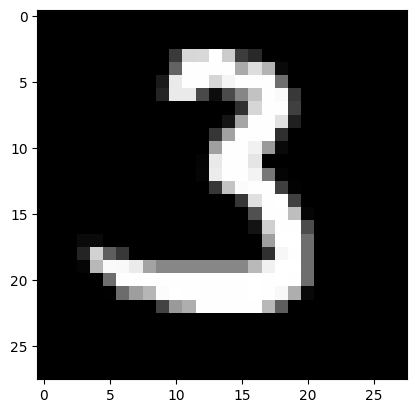

In [ ]:
index=np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

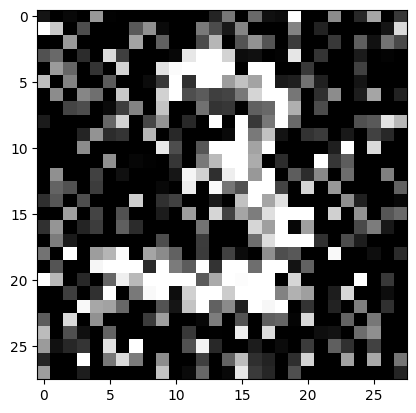

In [ ]:
plt.imshow(x_test_nsy[index].reshape(28,28))
plt.gray()

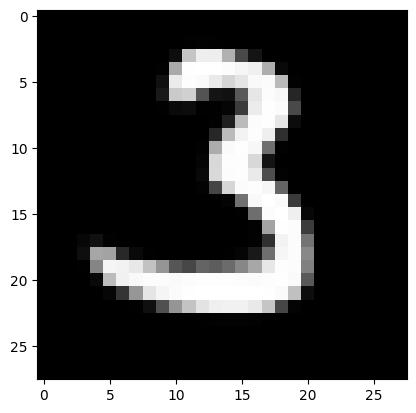

In [ ]:
plt.imshow(pred[index].reshape(28,28))
plt.gray()

In [ ]:
#train image enhancement
model.fit(x_train_nsy,x_train,epochs=20, batch_size=256, validation_data=(x_test_nsy,x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.1375 - val_loss: 0.1125
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1121 - val_loss: 0.1087
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1093 - val_loss: 0.1072
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1072 - val_loss: 0.1063
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1061 - val_loss: 0.1050
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1052 - val_loss: 0.1043
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1045 - val_loss: 0.1030
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1040 - val_loss: 0.1027
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1032 - val_loss: 0.1024
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1028 - val_loss: 0.1017
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1022 - val_loss: 0.1015
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/st

In [ ]:
prednsy=model.predict(x_test_nsy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


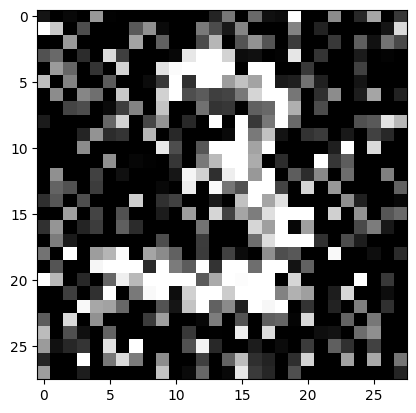

In [ ]:
plt.imshow(x_test_nsy[index].reshape(28,28))
plt.gray()

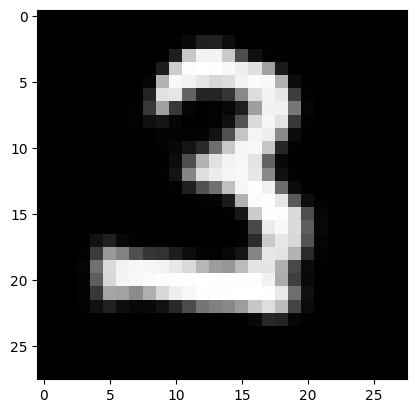

In [ ]:
plt.imshow(prednsy[index].reshape(28,28))
plt.gray()